In [32]:
# 說明：設置環境、import 套件
import math
import pandas as pd
import numpy as np
import pprint 
import matplotlib.pyplot as plt
from matplotlib import pylab
%pylab inline
#plt.style.use('ㄎ')
pylab.rcParams['figure.figsize'] = (20, 8)

Populating the interactive namespace from numpy and matplotlib


In [2]:
# color sets
cPurple = '#5628B4'
cLightPurple = '#9590D0'
cRed = '#D2553E'
cGreen = '#98B855'

In [5]:
import matplotlib.font_manager as fm 
myfont = fm.FontProperties( fname="/Library/Fonts/ヒラギノ丸ゴ ProN W4.ttc")   

In [6]:
# Global variables
CostRate = 3 # 一度電多少錢（估算，實際還要再確認）

### 原始資料說明 - 1
- 區間：20170801-20180131，一整個上學期(包含暑假後段一小部分及寒假前段一小部分)
- 間隔：一小時一筆
- 地點：所有的學生宿舍，以下我是針對十二舍做
- 一個地點的筆數：4409筆
- 總筆數 =48499 筆

In [3]:
filename = '[Detailed][new]Dorm12_hour_20170801_20180131.csv'
file = open('./Electricity_analytics-2017/02dataset/'+filename, encoding = 'utf8')
df = pd.read_csv(file)
path = './Electricity_analytics-2017/02dataset/'
del df['Unnamed: 0']
df.head()

,DateTime,Area,Building,Loop,Type,Usage,Date,Weekday,Week,Time,Cost
0,2017/08/01 00:00,S,D12,main,dorm,64.0,2017-08-01,2,31,00:00,192.0
1,2017/08/01 01:00,S,D12,main,dorm,59.0,2017-08-01,2,31,01:00,177.0
2,2017/08/01 02:00,S,D12,main,dorm,55.0,2017-08-01,2,31,02:00,165.0
3,2017/08/01 03:00,S,D12,main,dorm,55.0,2017-08-01,2,31,03:00,165.0
4,2017/08/01 04:00,S,D12,main,dorm,51.0,2017-08-01,2,31,04:00,153.0


### 切割資料
- 若發現資料太龐大，導致畫出的圖太擠，則使用下面這個cell切割資料

In [106]:
 def separate_index(df, week):
        for i in range(0, df['Usage'].size):
            if(df.loc[i].Week > week):
                return i
len = separate_index(df, 44)
len

2328

In [108]:
#若資料較龐大則切割資料
ans = df['Usage'].size/2
length = math.floor(ans)
df1 = df[:len]
df2 = df[len:]
df1[len-1:]

#經分割後
#df1(前段資料): 20170801-20171105
#df2(後段資料): 20171106-20180131

,DateTime,Area,Building,Loop,Type,Usage,Date,Weekday,Week,Time,Cost
2327,2017/11/05 23:00,S,D12,main,dorm,134.0,2017-11-05,7,44,23:00,402.0


### 圖一：每個小時的用電，106學年度上學期（Line Plot）
#### 觀察
- 週末的時候（藍線最高點），通常用電比較低
- 圖片中間有個低潮，猜測是國慶連假
- 隨著冬天而下降
- 資料波動大

Text(0.5,0,'Index')

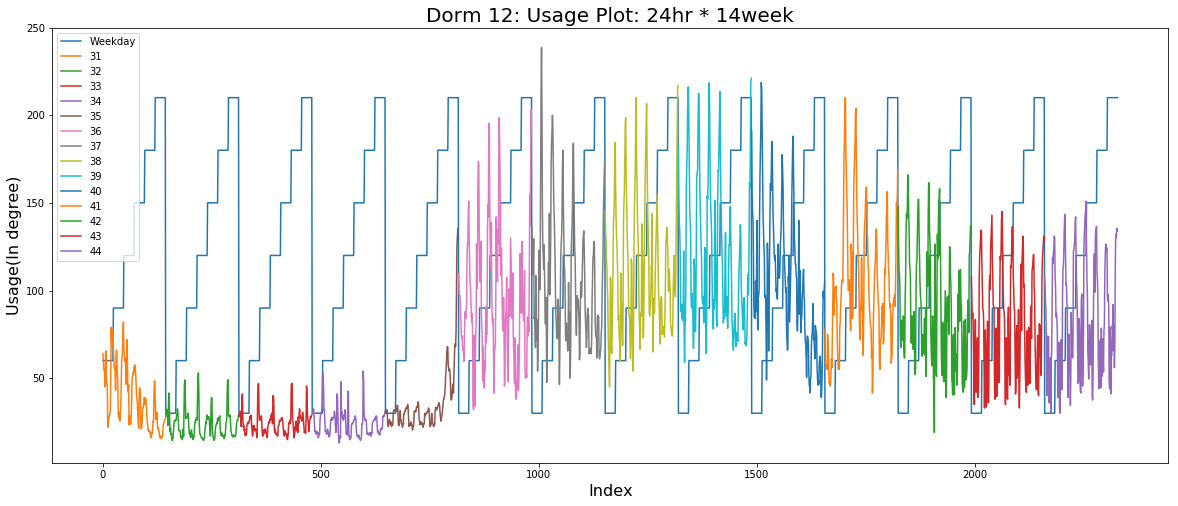

In [109]:
# 前14週 每小時的用電資料 (1704個點)

(df1.Weekday * 30).plot(legend = True)
# plt.xlabel('index')

df1.groupby(['Week']).Usage.plot(legend = True)
#.Usage.plot(legend = True)
plt.title('Dorm 12: Usage Plot: 24hr * 14week', fontsize = 20)
pylab.ylabel('Usage(In degree)',fontsize = 16)
pylab.xlabel('Index',fontsize = 16)


Text(0.5,0,'Index')

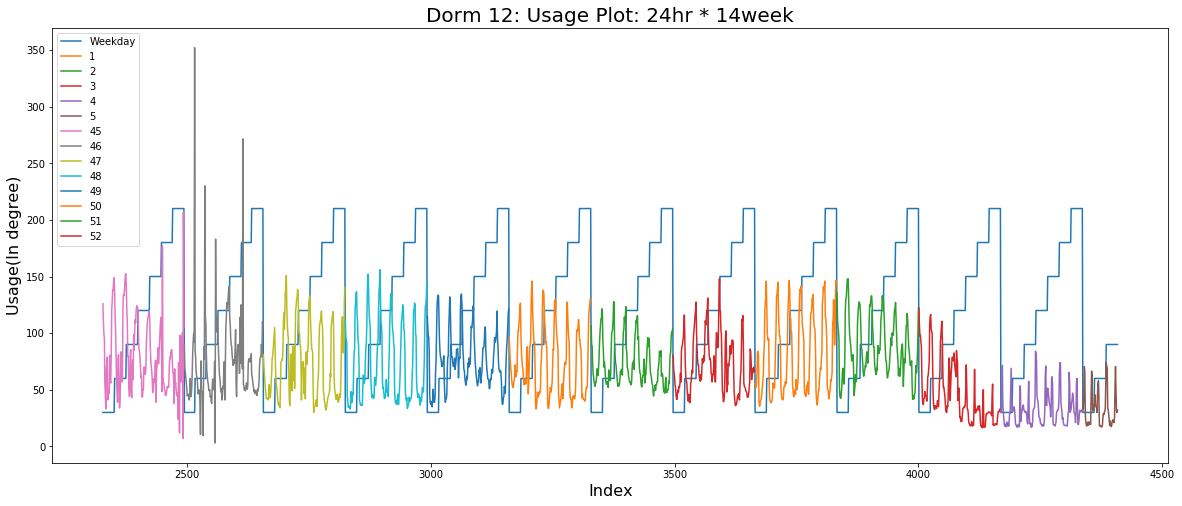

In [110]:
# 後14週 每小時的用電資料 (1704個點)

(df2.Weekday * 30).plot(legend = True)
# plt.xlabel('index')

df2.groupby(['Week']).Usage.plot(legend = True)
#.Usage.plot(legend = True)
plt.title('Dorm 12: Usage Plot: 24hr * 14week', fontsize = 20)
pylab.ylabel('Usage(In degree)',fontsize = 16)
pylab.xlabel('Index',fontsize = 16)


Week
1     AxesSubplot(0.125,0.125;0.775x0.755)
2     AxesSubplot(0.125,0.125;0.775x0.755)
3     AxesSubplot(0.125,0.125;0.775x0.755)
4     AxesSubplot(0.125,0.125;0.775x0.755)
5     AxesSubplot(0.125,0.125;0.775x0.755)
31    AxesSubplot(0.125,0.125;0.775x0.755)
32    AxesSubplot(0.125,0.125;0.775x0.755)
33    AxesSubplot(0.125,0.125;0.775x0.755)
34    AxesSubplot(0.125,0.125;0.775x0.755)
35    AxesSubplot(0.125,0.125;0.775x0.755)
36    AxesSubplot(0.125,0.125;0.775x0.755)
37    AxesSubplot(0.125,0.125;0.775x0.755)
38    AxesSubplot(0.125,0.125;0.775x0.755)
39    AxesSubplot(0.125,0.125;0.775x0.755)
40    AxesSubplot(0.125,0.125;0.775x0.755)
41    AxesSubplot(0.125,0.125;0.775x0.755)
42    AxesSubplot(0.125,0.125;0.775x0.755)
43    AxesSubplot(0.125,0.125;0.775x0.755)
44    AxesSubplot(0.125,0.125;0.775x0.755)
45    AxesSubplot(0.125,0.125;0.775x0.755)
46    AxesSubplot(0.125,0.125;0.775x0.755)
47    AxesSubplot(0.125,0.125;0.775x0.755)
48    AxesSubplot(0.125,0.125;0.775x0.755)
49    

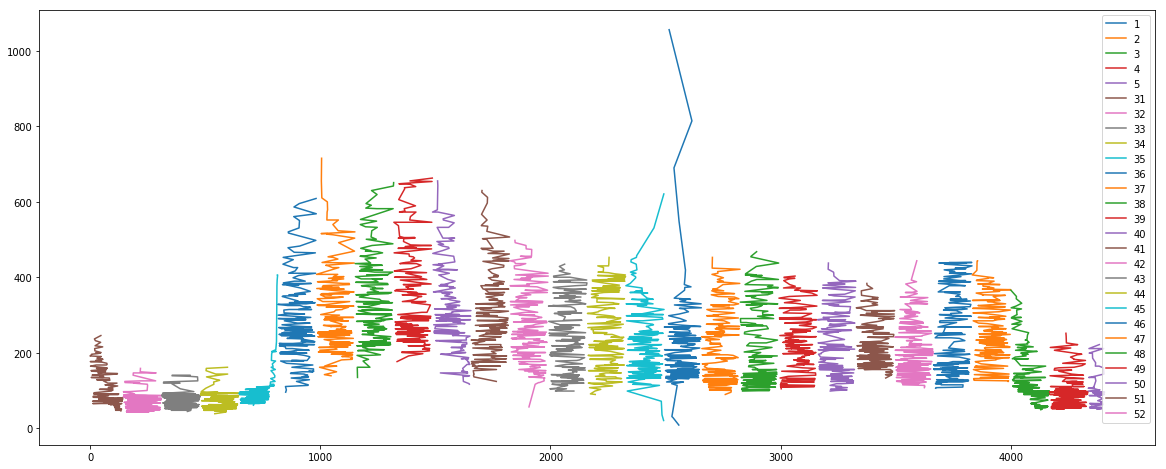

In [111]:
df.sort_values('Cost').groupby(['Week']).Cost.plot(legend = True)

### 圖二：最高日用電 
討論極端值的成因

Text(0.5,0,'Date')

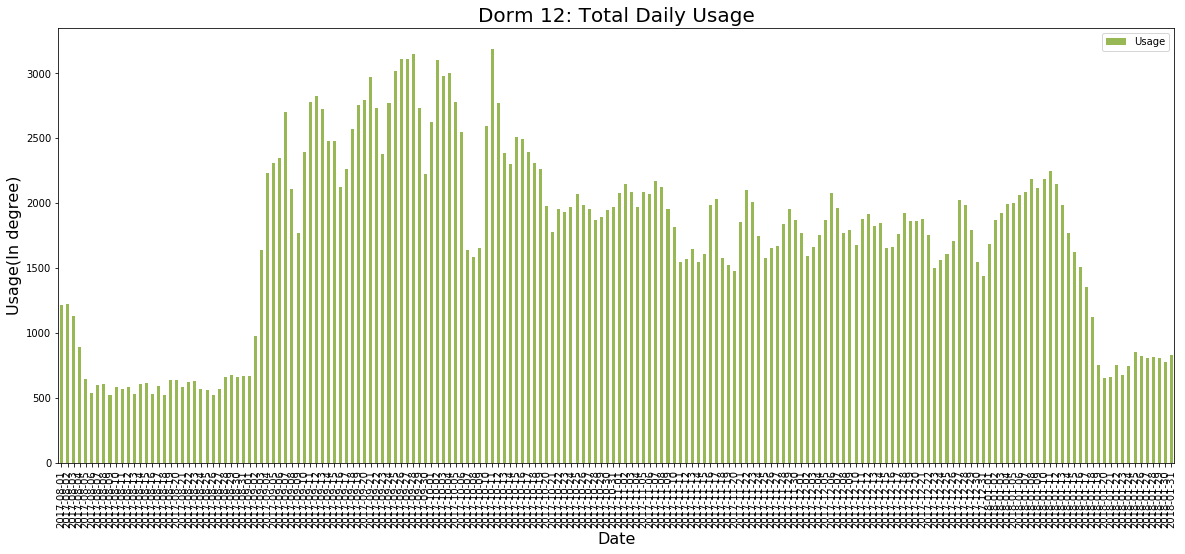

In [112]:
df_dorm_12_dailysum = df.groupby('Date').sum()
df_dorm_12_dailysum.Weekday = df_dorm_12_dailysum.Weekday/24
df_dorm_12_dailysum.Usage.plot.bar(legend = True,color = cGreen)
plt.title('Dorm 12: Total Daily Usage', fontsize = 20)
pylab.ylabel('Usage(In degree)',fontsize = 16)
pylab.xlabel('Date',fontsize = 16)

In [113]:
# 最高用電的幾天是...
# 為什麼這幾天會比較高呢？
print('Top 10 daily TOTAL use of dorm 12. From 9.01 - 11.10')
print(df_dorm_12_dailysum.sort_values('Usage')[-10:])
# print('Top 10 daily AVERAGE use of dorm 12. From 9.01 - 11.10')
# print(df_dorm_12_dailymean_sorted[-10:])

Top 10 daily TOTAL use of dorm 12. From 9.01 - 11.10
             Usage  Weekday  Week    Cost
Date                                     
2017-09-12  2821.5      2.0   888  8464.5
2017-09-21  2973.5      4.0   912  8920.5
2017-10-03  2981.0      2.0   960  8943.0
2017-10-04  3003.0      3.0   960  9009.0
2017-09-25  3019.0      1.0   936  9057.0
2017-10-02  3100.0      1.0   960  9300.0
2017-09-27  3105.0      3.0   936  9315.0
2017-09-26  3108.0      2.0   936  9324.0
2017-09-28  3150.0      4.0   936  9450.0
2017-10-11  3189.5      3.0   984  9568.5


觀察：其實最高用電的前十個日子，大多發生在九月十月，而且有連續的現象！

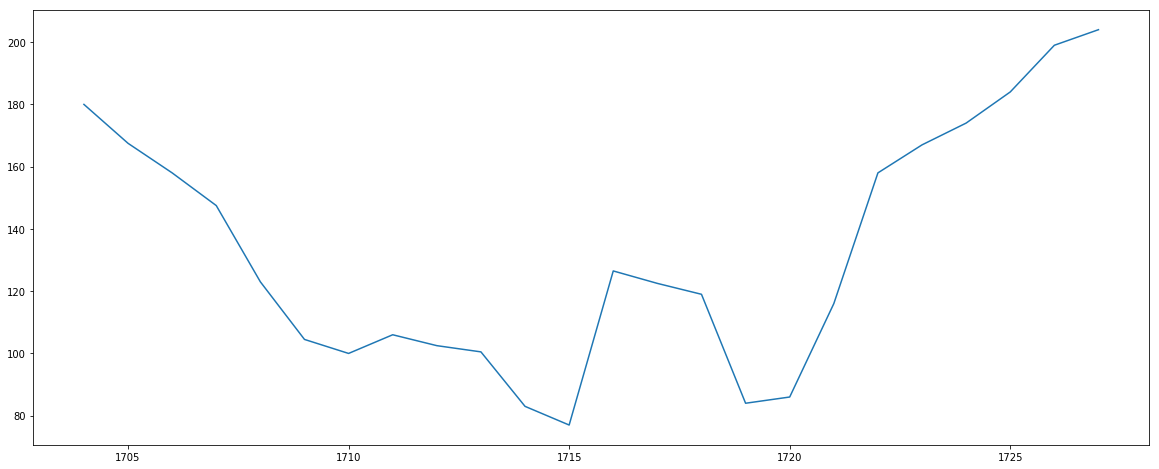

In [114]:
# 10.11 的用電繪圖
df[df.Date == '2017-10-11'].Usage.plot()
# xticks = list(df_dorm_12.Time.unique()) # bug to fix!!
# 不正常的地方：中午高峰

In [115]:
# 哪小時最耗電？
df.sort_values('Usage')[-100:].Time.value_counts()

22:00    26
23:00    24
21:00    19
00:00    13
20:00     9
19:00     4
01:00     3
03:00     1
06:00     1
Name: Time, dtype: int64

,DateTime,Area,Building,Loop,Type,Usage,Date,Weekday,Week,Time,Cost
2516,2017/11/13 23:00,S,D12,main,dorm,352.0,2017-11-13,1,46,23:00,1056.0


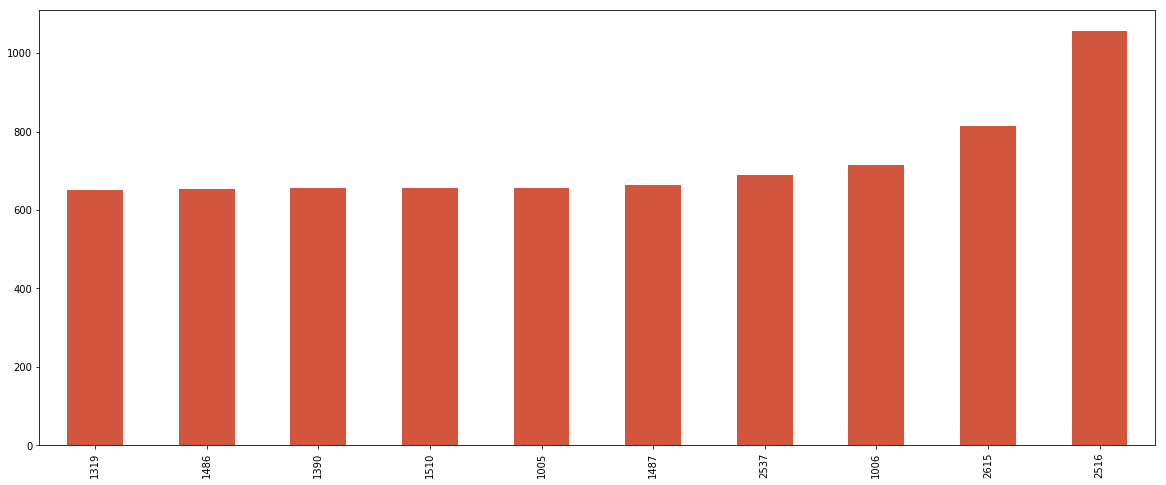

In [116]:
# Top 10 用電
# 看一下特高用電有多誇張，結果其實還好
df.sort_values('Usage')[-10:].Cost.plot.bar(color = cRed)
#發現有一小時真的特耗電

df.sort_values('Usage')[-1:]
# 2017/09/11 22:00 用電是 238.5, (12舍平均用電是96)
# 這個有辦法更改x軸的index嗎? 想改成 Datetime 或 Date

2017/9/11 為什麼用那麼多電呢？
我去查了日曆，原來是開學日的十點（一起打電動？煮火鍋？）

In [117]:
# 這裡我看不太懂~~~
# 五十天中，星期幾最耗電？
df.groupby('Date').mean().sort_values('Usage')[-50:].Weekday.value_counts()

4    9
3    9
2    9
5    7
1    7
7    5
6    4
Name: Weekday, dtype: int64

### 圖三：平均用電變化 - 依Weekday看
#### 觀察
- 週六大家回家，平均用電最低
- 週日回宿舍，用電比週六週五高

Text(0.5,0,'Weekday')

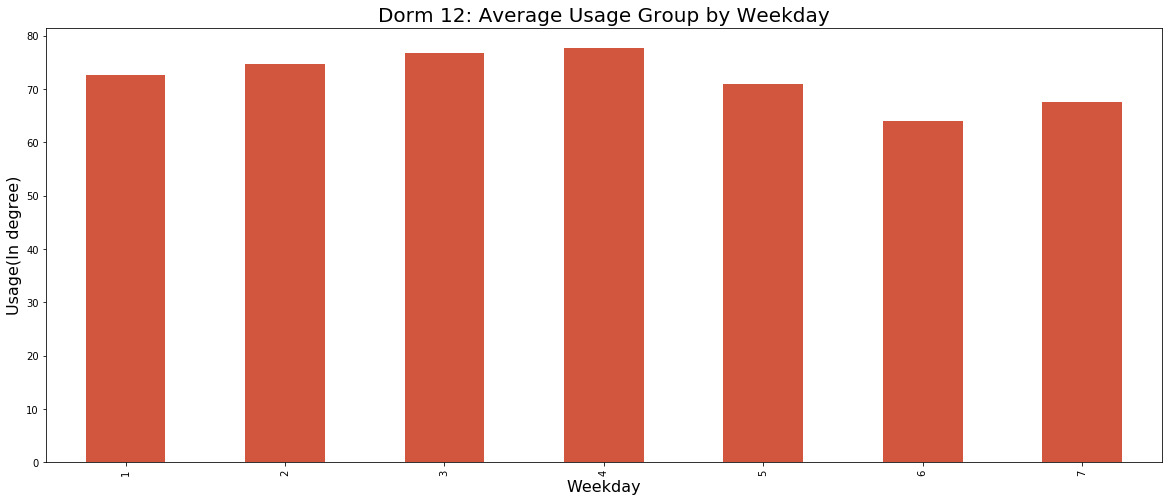

In [118]:
df_dorm_12_byWeekday = df.groupby('Weekday').mean()
df_dorm_12_byWeekday.Usage.plot.bar(legend = False,color = cRed)

plt.title('Dorm 12: Average Usage Group by Weekday', fontsize = 20)
pylab.ylabel('Usage(In degree)',fontsize = 16)
pylab.xlabel('Weekday',fontsize = 16)

### 圖三：各週用電變化 - 依Weekday看

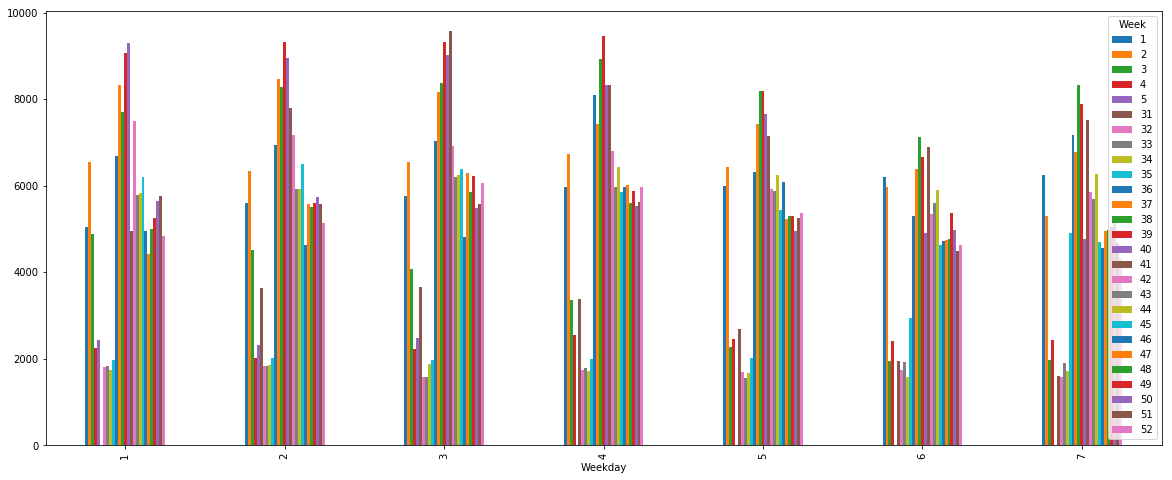

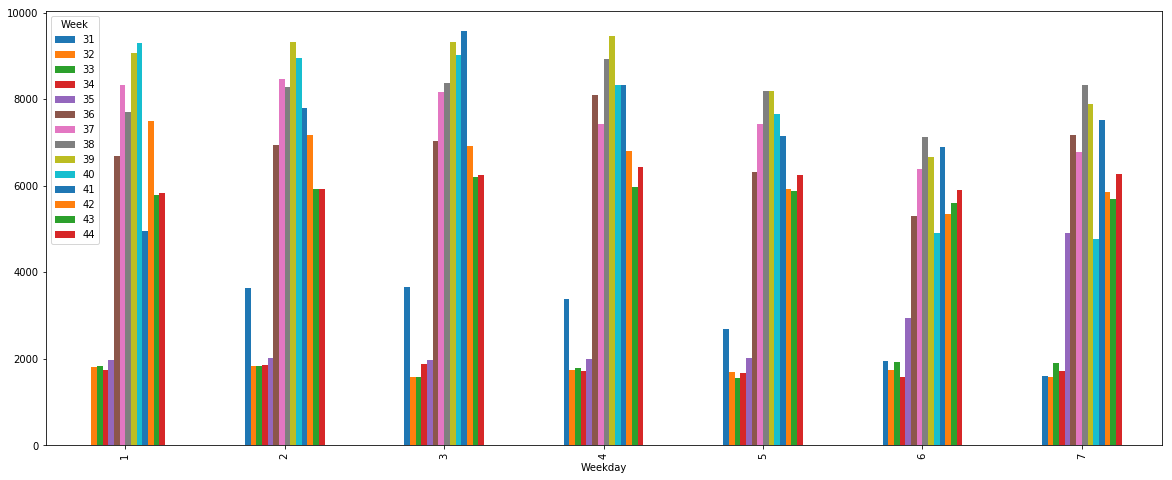

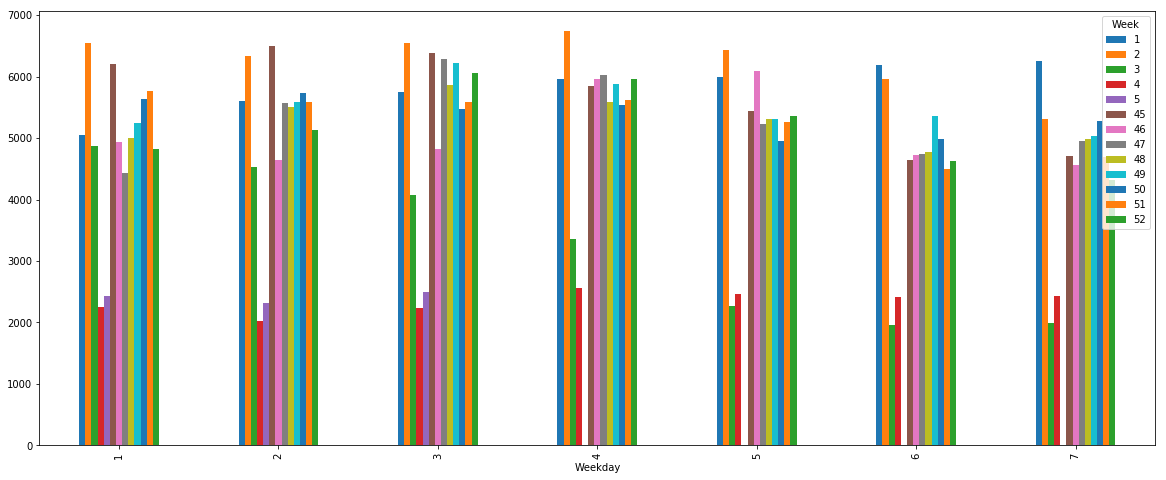

In [120]:
#未分割的圖表
df.groupby(['Weekday','Week']).Cost.sum().unstack().plot.bar(legend = True)
#資料前段圖表
df1.groupby(['Weekday','Week']).Cost.sum().unstack().plot.bar(legend = True)
#資料後段圖表
df2.groupby(['Weekday','Week']).Cost.sum().unstack().plot.bar(legend = True)

# 跟上一張圖的差別：可以看各周的變化

In [56]:
# 注意：取資料時，週五多一天
df.Weekday.value_counts()

3    648
2    647
7    624
5    624
4    624
1    622
6    620
Name: Weekday, dtype: int64

Text(0.5,0,'Week')

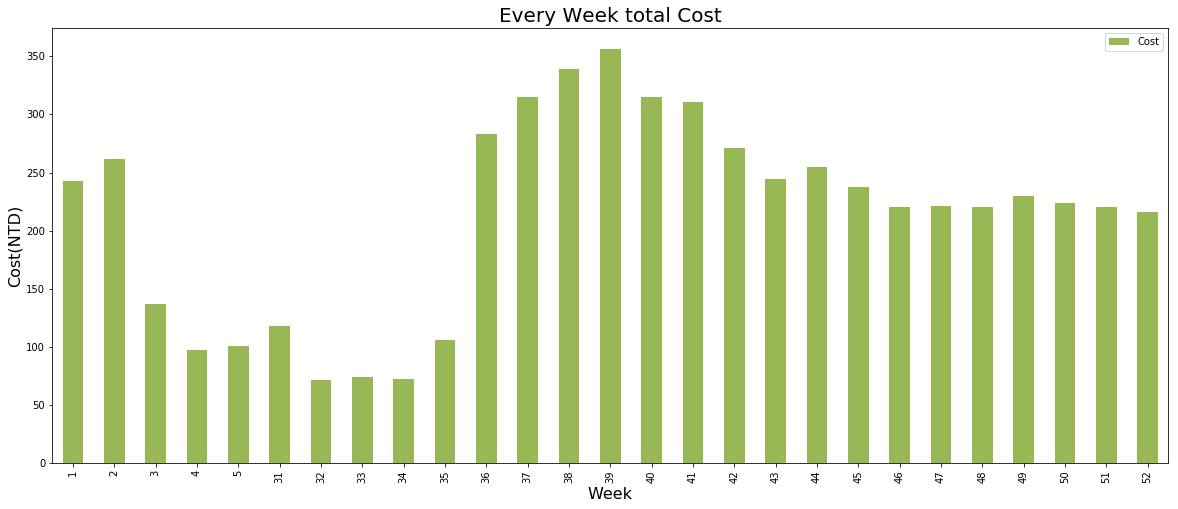

In [57]:
# df_dorm_12.groupby('Date').sum().Usage.plot.bar()
df.groupby('Week').mean().Cost.plot.bar(legend = True, color = cGreen)
plt.title('Every Week total Cost', fontsize = 20)
pylab.ylabel('Cost(NTD)',fontsize = 16)
pylab.xlabel('Week',fontsize = 16)

### 圖四：平均用電變化 - 依小時看

Text(0.5,0,'Time')

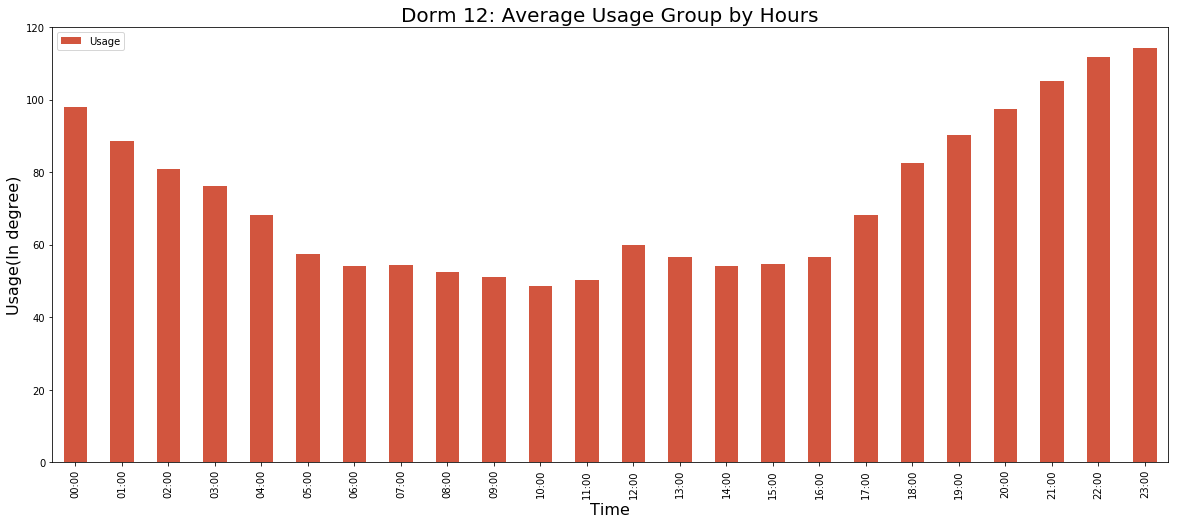

In [58]:
df.groupby('Time').Usage.mean().plot.bar(legend = True, color = cRed)
plt.title('Dorm 12: Average Usage Group by Hours', fontsize = 20)
pylab.ylabel('Usage(In degree)',fontsize = 16)
pylab.xlabel('Time',fontsize = 16)

### 觀察
- 這張是我覺得最有趣的，想法：可以拿去跟男生十舍比，看十二舍的人是不是比較早睡（省電）
- 最高用電落在晚上十一點到十二點。十二點會關燈。
- 關燈之後的下跌應該就是人為用電的減少（去睡覺了），人為用電除了桌電、吹風機以外，不知道洗澡熱水器有沒有被算在內？
- 早上七點起床有個Peak，可能是洗澡或開燈
- 中午十二點也有Peak，可能是回宿舍吃中飯
- 晚上六點開燈，所以用電升幅大

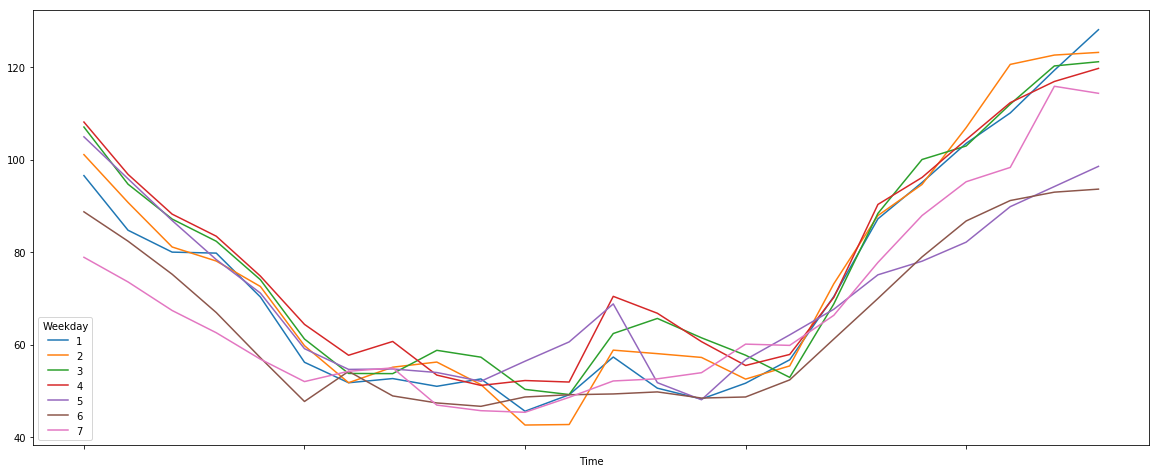

In [121]:
df.groupby(['Time','Weekday']).Usage.mean().unstack().plot(legend = True)
#.Usage.plot(legend = True)

Text(0.5,1,'Semester After Section Data')

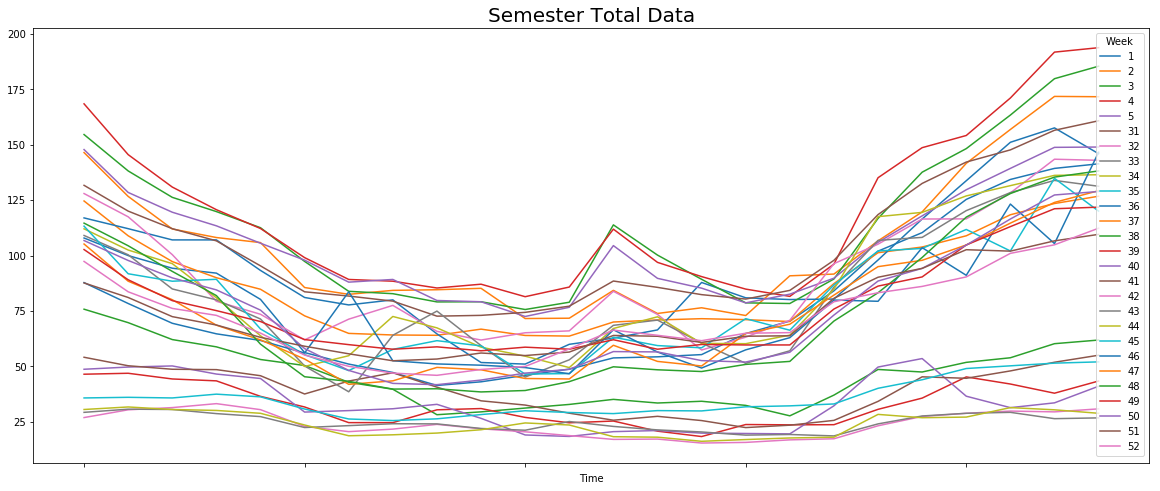

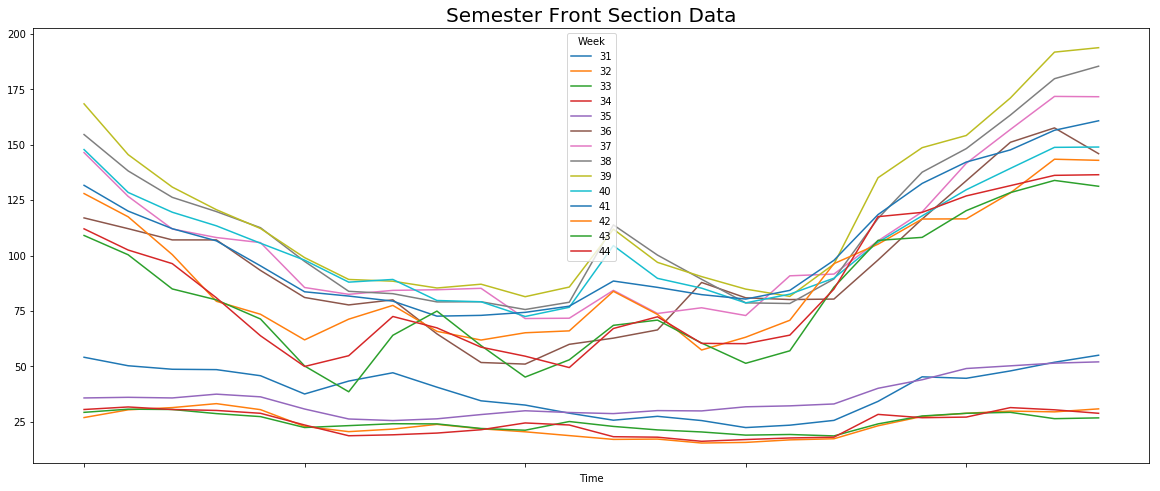

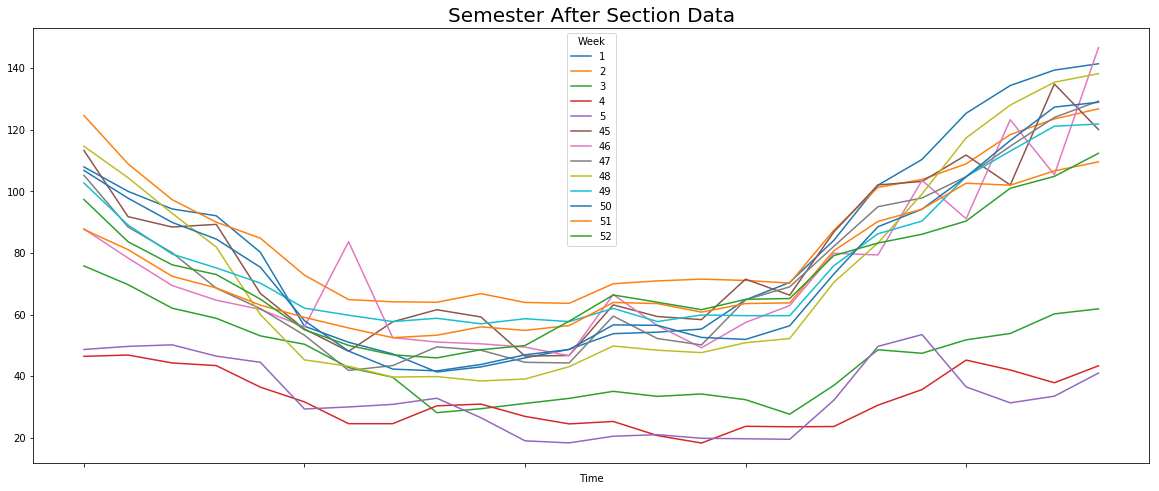

In [126]:
df.groupby(['Time','Week']).Usage.mean().unstack().plot(legend = True)
plt.title('Semester Total Data', fontsize = 20)
# 前段資料 自 2017-08-01 至 2017-11-05 
df1.groupby(['Time','Week']).Usage.mean().unstack().plot(legend = True)
plt.title('Semester Front Section Data', fontsize = 20)
# 前段資料 自 2017-11-06 至 2018-01-31 
df2.groupby(['Time','Week']).Usage.mean().unstack().plot(legend = True)
plt.title('Semester After Section Data', fontsize = 20)

### 圖七：每周在某一個時刻的用電變化 

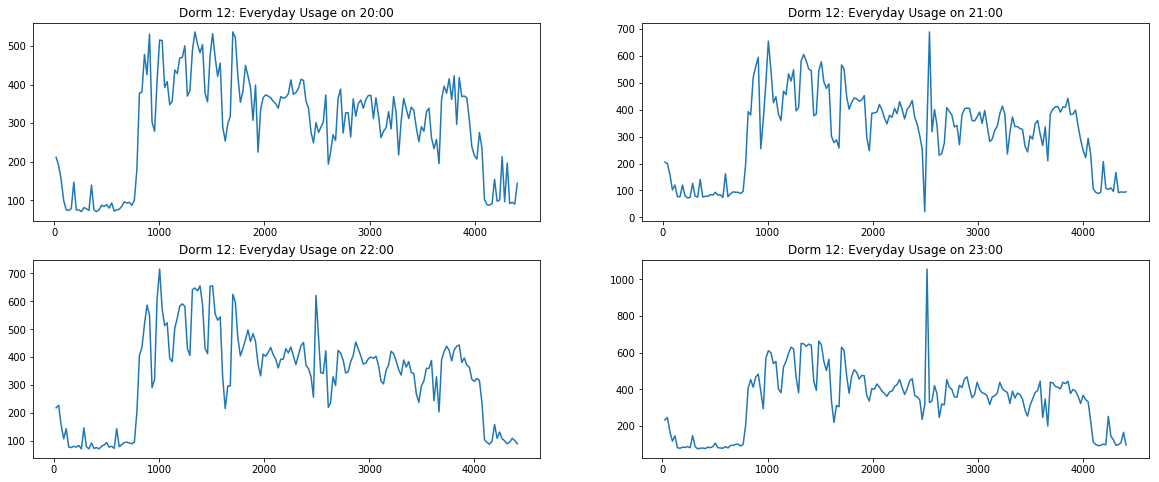

In [127]:
# 觀看某一個小時的用電量，在每天的變化

# df_dorm_12[df_dorm_12.Time == '23:00'].info()
fig, axes = plt.subplots(nrows=2, ncols=2)
df[df.Time == '20:00'].Cost.plot(ax=axes[0,0],title = 'Dorm 12: Everyday Usage on 20:00')
df[df.Time == '21:00'].Cost.plot(ax=axes[0,1],title = 'Dorm 12: Everyday Usage on 21:00')
df[df.Time == '22:00'].Cost.plot(ax=axes[1,0],title = 'Dorm 12: Everyday Usage on 22:00')
df[df.Time == '23:00'].Cost.plot(ax=axes[1,1],title = 'Dorm 12: Everyday Usage on 23:00')

## 成長率

In [131]:
# 使用 .pct_change()
df.groupby(['Week','Weekday']).mean().Cost.pct_change()[-20:]

Week  Weekday
50    2          0.017287
      3         -0.045752
      4          0.010685
      5         -0.103551
      6          0.004838
      7          0.060187
51    1          0.091683
      2         -0.031201
      3         -0.001342
      4          0.006719
      5         -0.063801
      6         -0.143998
      7          0.040640
52    1          0.030090
      2          0.063083
      3          0.180649
      4         -0.015598
      5         -0.100101
      6         -0.137228
      7         -0.067055
Name: Cost, dtype: float64

Text(0.5,0,'Week')

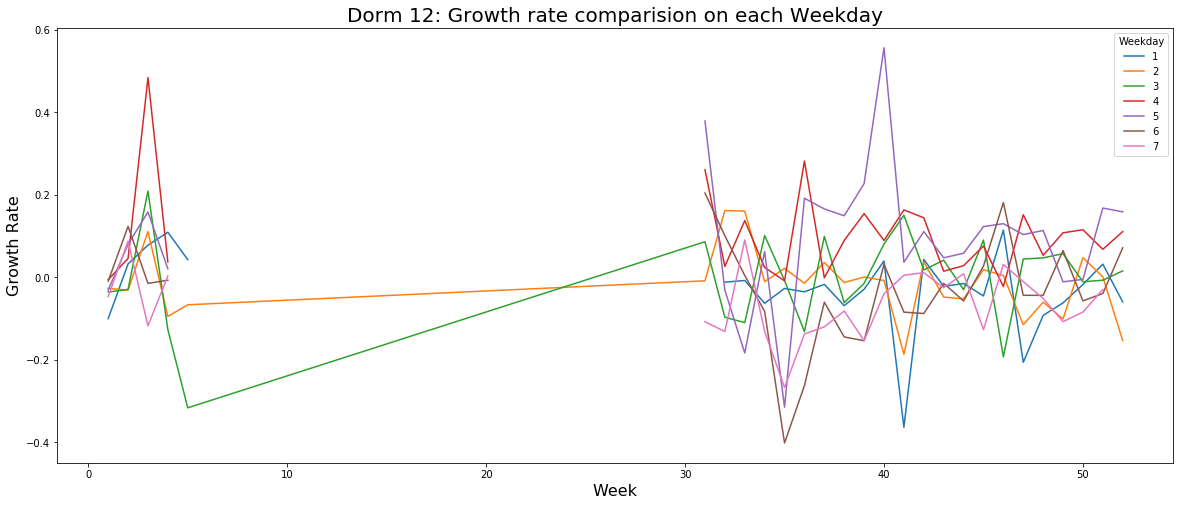

In [130]:
df.groupby(['Week','Weekday']).mean().Cost.pct_change(-1).unstack().plot()
plt.title('Dorm 12: Growth rate comparision on each Weekday', fontsize = 20)
pylab.ylabel('Growth Rate',fontsize = 16)
pylab.xlabel('Week',fontsize = 16) 

In [221]:
#探討peak的成因
df_dorm_12.groupby(['Week','Weekday']).mean().Cost.pct_change(-1).sort_values()[-10:]


Week  Weekday
38    5          0.149568
41    3          0.150613
39    4          0.154692
41    4          0.163728
37    5          0.166040
36    5          0.191959
39    5          0.227447
36    4          0.282185
40    5          0.556947
45    5               NaN
Name: Cost, dtype: float64

                    Usage      Week        Cost
Time  Weekday                                  
00:00 1         96.538462  34.50000  289.615385
      2        101.074074  34.37037  303.222222
      3        107.037037  34.37037  321.111111
      4        108.115385  35.50000  324.346154
      5        104.923077  35.50000  314.769231
      6         88.711538  35.50000  266.134615
      7         78.884615  35.50000  236.653846
01:00 1         84.730769  34.50000  254.192308
      2         90.740741  34.37037  272.222222
      3         94.685185  34.37037  284.055556
                  Usage      Week      Cost
Time  Weekday                              
00:00 1       -0.044874  0.003772 -0.044874
      2       -0.055709  0.000000 -0.055709
      3       -0.009974 -0.031821 -0.009974
      4        0.030425  0.000000  0.030425
      5        0.182744  0.000000  0.182744
      6        0.124573  0.000000  0.124573
      7       -0.068997  0.028986 -0.068997
01:00 1       -0.066232  0.0

Text(0.5,0,'Hour')

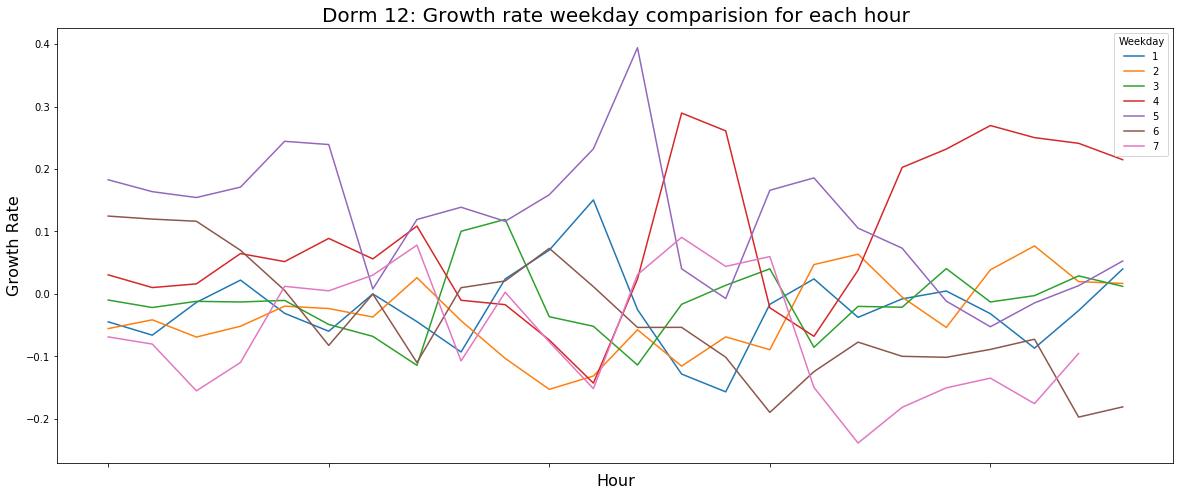

In [133]:
print(df.groupby(['Time','Weekday']).mean()[:10])
print(df.groupby(['Time','Weekday']).mean().pct_change(-1)[:10])
df.groupby(['Time','Weekday']).mean().Cost.pct_change(-1).unstack().plot()
plt.title('Dorm 12: Growth rate weekday comparision for each hour', fontsize = 20)
pylab.ylabel('Growth Rate',fontsize = 16)
pylab.xlabel('Hour',fontsize = 16) 

## 白天 / 晚上用電比率

In [134]:
# df_dorm_12.groupby(['Time','Weekday])
# df_dorm_12_night = df_dorm_12[((df_dorm_12.Time == '03:00') or (df_dorm_12.Time == '04:00') or (df_dorm_12.Time == '05:00'))]
df_dorm_12_night = df.loc[df['Time'].isin(['03:00', '04:00', '05:00', '06:00'])]
df_dorm_12_day = df.loc[df['Time'].isin(['07:00', '08:00', '09:00', '10:00', '11:00', '12:00', '13:00',
       '14:00', '15:00', '16:00', '17:00', '18:00'])]
df_dorm_12_night = df_dorm_12_night.groupby('Date').mean()# 夜晚用電
df_dorm_12_day = df_dorm_12_day.groupby('Date').mean()
(df_dorm_12_day/df_dorm_12_night).head()

,Usage,Weekday,Week,Cost
Date,,,,
2017-08-01,0.695988,1.0,1.0,0.695988
2017-08-02,0.746106,1.0,1.0,0.746106
2017-08-03,0.706790,1.0,1.0,0.706790
2017-08-04,0.694678,1.0,1.0,0.694678
2017-08-05,0.633609,1.0,1.0,0.633609


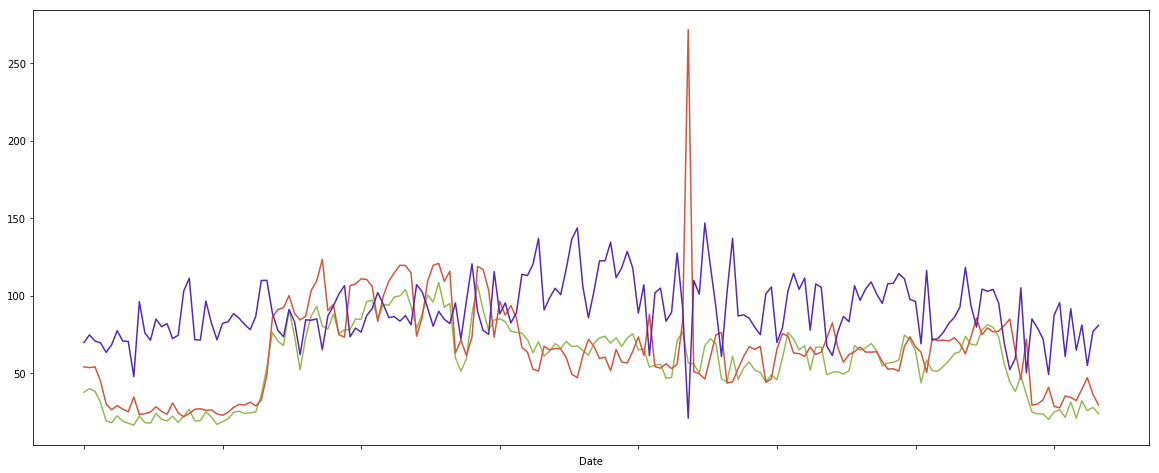

In [135]:
df_dorm_12_day.Usage.plot(color = cGreen)
df_dorm_12_night.Usage.plot(color = cRed)
((df_dorm_12_day/df_dorm_12_night).Usage*100).plot(color = cPurple) 
# bug ： 如何把兩個不同scale的圖畫再一起
# bug ： 如何畫線